In [1]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow 

2024-11-20 17:39:49.384958: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## splitting the data

In [14]:
train_img_gen= ImageDataGenerator(rescale= 1.1255, shear_range=0.2, zoom_range=0.2)

train_data = train_img_gen.flow_from_directory("/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Training_Set",
    target_size=(64, 64),batch_size=32,class_mode='binary')

Found 4000 images belonging to 2 classes.


In [15]:
test_img_gen= ImageDataGenerator(rescale = 1.1255)

test_data = test_img_gen.flow_from_directory("/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set",
    target_size=(64, 64),batch_size=32,class_mode='binary')

Found 798 images belonging to 2 classes.


## Deep Learning starts

In [34]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### input layer

In [36]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64,3)))

model.add(MaxPool2D(pool_size=2, strides=1))

### Hidden layers

In [37]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

### Output layers

In [38]:
model.add(Dense(units=1, activation='sigmoid'))

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x=train_data, validation_data=test_data, epochs=12)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
 52/125 ━━━━━━━━━━━━━━━━━━━━ 41s 570ms/step - accuracy: 0.5874 - loss: 287.1156

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 619ms/step - accuracy: 0.6295 - loss: 151.6131 - val_accuracy: 0.8158 - val_loss: 0.4400
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 609ms/step - accuracy: 0.7749 - loss: 0.4885 - val_accuracy: 0.8697 - val_loss: 0.3171
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 627ms/step - accuracy: 0.8296 - loss: 0.3914 - val_accuracy: 0.8559 - val_loss: 0.2992
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 616ms/step - accuracy: 0.8784 - loss: 0.3056 - val_accuracy: 0.8183 - val_loss: 0.4525
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 605ms/step - accuracy: 0.8603 - loss: 0.3248 - val_accuracy: 0.9185 - val_loss: 0.2061
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 834ms/step - accuracy: 0.9030 - loss: 0.2549 - val_accuracy: 0.8872 - val_loss: 0.2756
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 618ms/step - accuracy: 0.9045 - loss: 0.2349 - val_accuracy: 0.9223 - val_loss: 0.2032
Epoch 8/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 73s 586ms/step - accuracy: 0.9064 - loss: 0.2464 - 

### checking the image

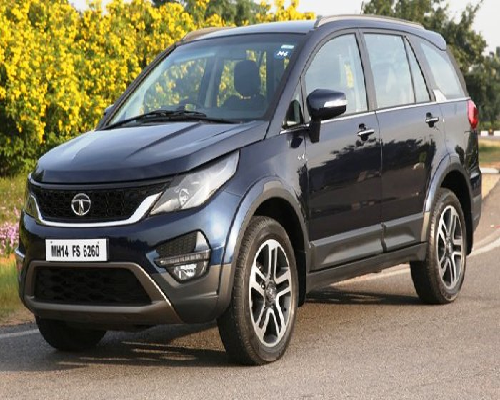

In [43]:
from keras.utils import load_img
img= load_img(r"/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set/car/Car (4).jpg",
              target_size=(400,500),color_mode='rgb')
img


### Now asking model if its car or bike

In [44]:
from keras.preprocessing import image

train_data.class_indices

{'Bike': 0, 'Car': 1}

In [69]:
test_image= load_img(r"/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set/bike/Bike (1).jpg",
              target_size=(64,64))

In [70]:
test_image_array = image.img_to_array(test_image)

In [71]:
# test_image_array = np.repeat(test_image, 3, axis=1)

In [72]:
test_image2 = np.expand_dims(test_image_array, axis=0)

In [73]:
result = model.predict(test_image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [74]:
if result[0][0]== 1:
    prediction='Its a Bike'
else:
    prediction='Its a Car'

print(prediction)

Its a Car


In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Data generators with proper rescale values
train_img_gen = ImageDataGenerator(rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_img_gen = ImageDataGenerator(rescale=1.0 / 255)

# Training and test datasets
train_data = train_img_gen.flow_from_directory(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Training_Set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_data = test_img_gen.flow_from_directory(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Model definition
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x=train_data, validation_data=test_data, epochs=12)

# Class indices mapping
print("Class Indices:", train_data.class_indices)

# Load and preprocess test image
test_image = load_img(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set/bike/Bike (1).jpg",
    target_size=(64, 64)
)
test_image_array = img_to_array(test_image)
test_image_scaled = test_image_array / 255.0  # Match rescaling used in training
test_image_expanded = np.expand_dims(test_image_scaled, axis=0)

# Predict
result = model.predict(test_image_expanded)
if result[0][0] > 0.5:
    prediction = "It's a Bike"
else:
    prediction = "It's a Car"

print(prediction)

Found 4000 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - accuracy: 0.6792 - loss: 0.5984 - val_accuracy: 0.8697 - val_loss: 0.3046
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 243ms/step - accuracy: 0.8807 - loss: 0.2842 - val_accuracy: 0.8622 - val_loss: 0.3182
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 223ms/step - accuracy: 0.8955 - loss: 0.2562 - val_accuracy: 0.8684 - val_loss: 0.3238
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.9051 - loss: 0.2276 - val_accuracy: 0.8396 - val_loss: 0.3825
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.9189 - loss: 0.2183 - val_accuracy: 0.8847 - val_loss: 0.2855
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.9233 - loss: 0.2054 - val_accuracy: 0.8972 - val_loss: 0.2580
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 221ms/step - accuracy: 0.9350 - loss: 0.1739 - val_accuracy: 0.9085 - val_loss: 0.2149
Epoch 8/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9361 - loss: 0.1627 - val_a

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Data generators
train_img_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2]
)
test_img_gen = ImageDataGenerator(rescale=1.0 / 255)

# Data
train_data = train_img_gen.flow_from_directory(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Training_Set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
test_data = test_img_gen.flow_from_directory(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64,3)))

model.add(MaxPool2D(pool_size=2, strides=1))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(x=train_data, validation_data=test_data, epochs=12)

# Class indices
print("Class Indices:", train_data.class_indices)

# Test prediction
test_image = load_img(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set/bike/Bike (1).jpg",
    target_size=(64, 64)
)
test_image_array = img_to_array(test_image) / 255.0
test_image_expanded = np.expand_dims(test_image_array, axis=0)

result = model.predict(test_image_expanded)
class_indices = train_data.class_indices

if result[0][0] > 0.5:
    prediction = "It's a " + list(class_indices.keys())[1]  # Key for 1
else:
    prediction = "It's a " + list(class_indices.keys())[0]  # Key for 0

print(prediction)


Found 4000 images belonging to 2 classes.
Found 798 images belonging to 2 classes.
Epoch 1/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 640ms/step - accuracy: 0.6856 - loss: 0.8132 - val_accuracy: 0.7820 - val_loss: 0.5366
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 683ms/step - accuracy: 0.8605 - loss: 0.3364 - val_accuracy: 0.8120 - val_loss: 0.4339
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 639ms/step - accuracy: 0.8772 - loss: 0.3019 - val_accuracy: 0.8358 - val_loss: 0.3737
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 73s 582ms/step - accuracy: 0.8903 - loss: 0.2723 - val_accuracy: 0.8885 - val_loss: 0.3091
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 622ms/step - accuracy: 0.8985 - loss: 0.2426 - val_accuracy: 0.9261 - val_loss: 0.2063
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 579ms/step - accuracy: 0.8976 - loss: 0.2543 - val_accuracy: 0.9323 - val_loss: 0.1659
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 606ms/step - accuracy: 0.9087 - loss: 0.2266 - val_accuracy: 0.8759 - val_loss: 0.3145


In [77]:
test_image = load_img(
    "/Users/mdfarazali/Documents/AI ML/DL/DL day 3/Car-Bike-Dataset/Test_Set/car/Car (1).png",
    target_size=(64, 64)
)

In [78]:
test_image_array = img_to_array(test_image) / 255.0
test_image_expanded = np.expand_dims(test_image_array, axis=0)

result = model.predict(test_image_expanded)
class_indices = train_data.class_indices

if result[0][0] > 0.5:
    prediction = "It's a " + list(class_indices.keys())[1]  # Key for 1
else:
    prediction = "It's a " + list(class_indices.keys())[0]  # Key for 0

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
It's a Car


In [80]:
import joblib
# Save the model to an h5 file
model.save("car_bike_classifier.h5")